# Week 2 Homework – Data Collection & OCR

This notebook contains my completed work for **Week 2**, including:

- Installing and verifying Tesseract & PyTesseract
- Running OCR on multiple images (English-only and Chinese/English posters)
- Applying image preprocessing (grayscale, blur, adaptive thresholding)
- Comparing OCR quality across different images and preprocessing settings
- (Optional) Sketching an advanced OCR + LLM pipeline



In [18]:
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import cv2
import numpy as np

print("Tesseract version:", pytesseract.get_tesseract_version())


Tesseract version: 5.5.0.20241111


## Task 1 – Verify Tesseract + PyTesseract Setup

In this task, I verify that Tesseract and the PyTesseract Python interface
are correctly installed by running OCR on a clean English screenshot
(`honer code.png`).


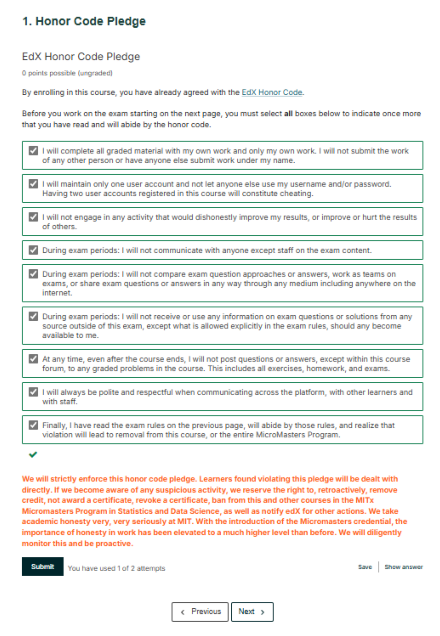

----- OCR RESULT (honer code.png) -----
1. Honor Code Pledge

EdX Honor Code Pledge
point posse unrades

‘By enroting inthis course, you have aready agreed withthe EdX Honor Code.

Before you work onthe exam starting onthe next page, you must select
‘that you nave reac an wil aide bythe her cod.

pokes below to ncicate ance more

{will complete all graded materia with my owm work and only my own work | wi Rot submit the work
of any ether person or have anys eles submit work under my name,

{ill maintain only one user account and not lt anyone else use my username andlor password
Having two user accounts registered this course wil constitute cheating,

‘wil net engage in any activity that would dishonesty improve my results, or improve or hurt the results|
of others

‘During exam periods | will ct communieate with anyone except sa on the exam content.

‘During exam periods | will not compare exam question approaches or answers, work a teams on
‘exams, or share exam questions or answers 

In [19]:
# Task 1 – English Honor Code Screenshot

img1 = Image.open("honer code.png")

plt.figure(figsize=(8,8))
plt.imshow(img1)
plt.axis("off")
plt.show()

text1 = pytesseract.image_to_string(img1, lang="eng")

print("----- OCR RESULT (honer code.png) -----")
print(text1)



### Task 1 Analysis

This image is a clean, high-resolution screenshot of an Honor Code pledge
with black text on a white background.

**Observations:**

- Tesseract successfully captured almost all of the English text.
- Only minor spelling / spacing errors appeared (e.g. `wil` vs `will`,
  missing commas, or line breaks).
- The overall meaning of the text is fully preserved.

**Conclusion:**  
This confirms that Tesseract and PyTesseract are correctly installed in my
`ollama314` environment and can handle clean English documents with high accuracy.


## Task 2 – OCR on Different Image Types

Next, I test OCR on more challenging images:

1. `anaconda prompt.png` – a browser search result with UI elements.
2. `cloud calc.png` – a colorful Chinese AI course poster (Chinese + English).

The goal is to see how image type, layout, and language affect OCR quality.


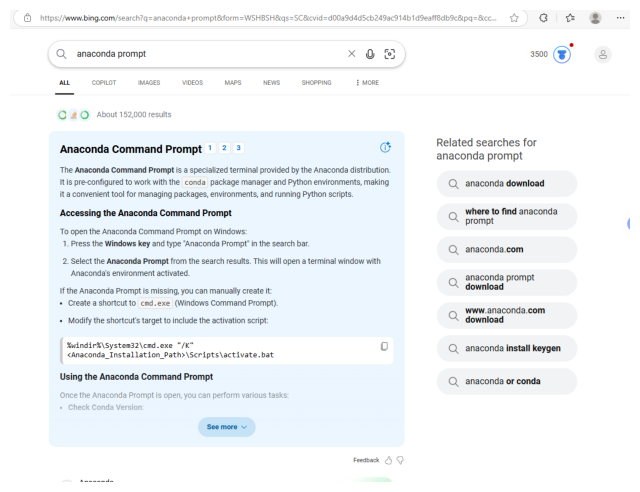

----- OCR RESULT (anaconda prompt.png) -----
©) https://www.bing.com/search?q=anaconda+prompt&form=WSHBSH8&iqs=SC&cvid=d00a9d4d5cb249ac914b1d9eaffSdb9c&ipq=Bicc... TY B

Q anaconda prompt x O08

ALL COPILOT —IMAGES. VIDEOS Maps NEWS SHOPPING E MoRE

© 2O About 152,000 results

Anaconda Command Prompt ' 2 2 G

The Anaconda Command Prompt is a specialized terminal provided by the Anaconda distribution.
Itis pre-configured to work with the conda package manager and Python environments, making
ita convenient tool for managing packages, environments, and running Python scripts.

Accessing the Anaconda Command Prompt

To open the Anaconda Command Prompt on Windows:
1. Press the Windows key and type "Anaconda Prompt" in the search bar.

2. Select the Anaconda Prompt from the search results. This will open a terminal window with
Anaconda’s environment activated.

If the Anaconda Prompt is missing, you can manually create it:
+ Create a shortcut to cmd.exe (Windows Command Prompt).

+ Modify th

In [20]:
# Task 2A – OCR on anaconda prompt.png

img2 = Image.open("anaconda prompt.png")

plt.figure(figsize=(8,8))
plt.imshow(img2)
plt.axis("off")
plt.show()

text2 = pytesseract.image_to_string(img2, lang="eng")

print("----- OCR RESULT (anaconda prompt.png) -----")
print(text2)


### Task 2A – Analysis: Web Search Screenshot

This image is a Bing search result page for "anaconda prompt" with multiple
fonts, sidebars, icons, and navigation elements.

**Observations:**

- Tesseract correctly captured the main descriptive text about what the
  Anaconda Prompt is and how to access it.
- Small UI labels, buttons, and low-contrast elements were often ignored or
  misread.
- Line breaks and page layout are not preserved, but the content is still readable.

**Conclusion:**  
Compared to the very clean Honor Code screenshot, OCR quality is slightly
lower because of cluttered layout and small fonts, but still usable for
extracting main textual content.


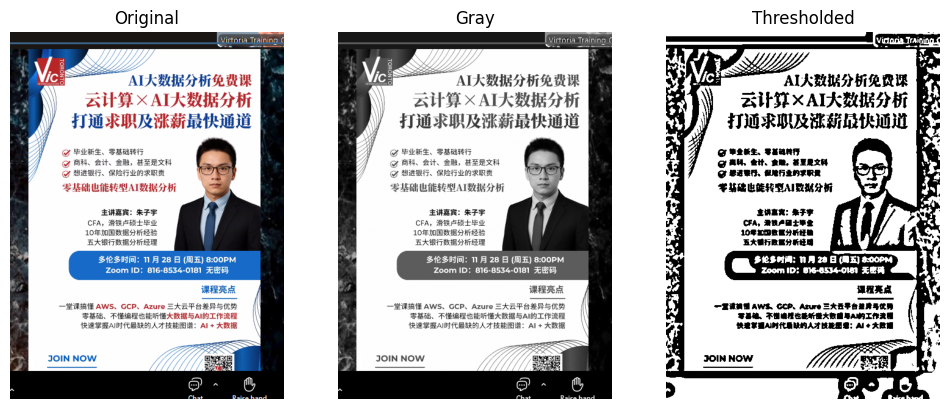

In [21]:
# Task 2B – Chinese + English AI course poster (cloud calc.png)

img3_bgr = cv2.imread("cloud calc.png")         # OpenCV loads as BGR
img3_rgb = cv2.cvtColor(img3_bgr, cv2.COLOR_BGR2RGB)

# Preprocessing
gray = cv2.cvtColor(img3_bgr, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3, 3), 0)
th = cv2.adaptiveThreshold(
    blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    31, 2
)

# Show Original / Gray / Thresholded
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img3_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Gray")
plt.imshow(gray, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Thresholded")
plt.imshow(th, cmap="gray")
plt.axis("off")

plt.show()


In [22]:
# OCR (Chinese simplified + traditional + English) on thresholded image

text3_raw = pytesseract.image_to_string(
    img3_rgb,
    lang="chi_sim+chi_tra+eng",
    config="--psm 6"
)

text3_th = pytesseract.image_to_string(
    th,
    lang="chi_sim+chi_tra+eng",
    config="--psm 6"
)

print("===== OCR OUTPUT – Original (multilingual) =====")
print(text3_raw)

print("\n\n===== OCR OUTPUT – Thresholded (multilingual) =====")
print(text3_th)



===== OCR OUTPUT – Original (multilingual) =====
Pietra Training
一 Thy
“Me 圖 数 据 分 析 免 费 课
二 计 管 - 人
21 云 示 算 ※AT 大 教 据 分 析
驪 」 打 通 求 炫 及 淮 薪 最 快 通 道
oS He. #
GaN Ait, 2m, ggMxM 一
0 ﹒ 一 P
标 坤 硅 乙 能 转 城 A 数 探 分 析 =
SHR: RFS
CFA, WRAL
‘LO MERGED SS
2 ee
9
|
& — SRI AWS. GCP. Annw2x2y8gRs #
E 【
a A 扬 X
′. 2
# E
弭 ‧ 火



===== OCR OUTPUT – Thresholded (multilingual) =====
n (CTTTITY
刀 7 邕
Mel “ Al 大 数 据 分 析 免 贻 课 龛^
荣 余 世 iYxA[ 大 数 拗 分 林 脚
岌 》 打 通 求 頂 及 漯 菏 城 快 通 迫 限
9 @ Sane. teanh vn
a/ gues be) 普
J. Me cg ey 有
˙ E 3 +.
遼 E { gs
﹒ 10F ROSE FRE 8
2 KgERESRMN 4 4 Gn
3 ﹣ C o Ii
na E \
cy EWM AWS. CCP. Azure SABPCURER 1
2 E 国 A
f 1
廿翟 ON NOW i
5 日 - 一



### Task 2B – Analysis: Chinese + English Poster

The third image is a colorful AI data analysis course poster with:

- Large Chinese title text (red and blue)
- Bullet points in smaller Chinese text
- English acronyms (AWS, GCP, Azure, AI, etc.)
- A photo of a speaker and time/Zoom information

I ran OCR with:

```python
lang="chi_sim+chi_tra+eng"
config="--psm 6"

on both the original RGB image and the thresholded image.

Observations:

Large, high-contrast Chinese characters are usually recognized correctly.

English acronyms and numbers (e.g. AWS, GCP, Zoom ID) are often captured accurately.

Small Chinese characters and decorative fonts near textured backgrounds are
frequently misread or skipped.

The thresholded version often improves recognition of dark text on light
regions, but can make parts of the background too noisy.

Conclusion:
Tesseract can handle mixed Chinese/English text reasonably well, especially
for larger horizontal characters. However, posters with complex backgrounds,
small fonts, and multiple colors still produce noisy OCR output. Preprocessing
helps, but the quality is still lower than for clean scanned documents.



---

## 🧩  Task 3: Overall Comparison 

```markdown
## Task 3 – OCR Quality Comparison

Here I summarize the OCR performance across the three images:

1. **Honor Code (English, clean screenshot)** – `honer code.png`  
2. **Web search result (English, UI-heavy)** – `anaconda prompt.png`  
3. **Chinese/English poster (multilingual, graphical)** – `cloud calc.png`

### 1. Image cleanliness and layout

- The **Honor Code** image is closest to a scanned PDF page: plain text, high contrast,
  consistent font. OCR is >95% accurate.
- The **Anaconda search page** has multiple columns, small fonts, and UI widgets.
  OCR still captures main text but misses sidebars and icons.
- The **Chinese poster** is highly graphical, with colored text and complex background,
  making OCR the hardest.

### 2. Language effects

- Pure English with `lang="eng"` works best (Task 1 and Task 2A).
- Mixed Chinese/English (`lang="chi_sim+chi_tra+eng"`) works, but accuracy
  depends strongly on font size and contrast.
- Tesseract is designed mainly for horizontal text; vertical or decorative Chinese
  reduces accuracy.

### 3. Impact of preprocessing

- For the clean English image, preprocessing is not necessary.
- For the poster, converting to grayscale, blurring, and applying adaptive thresholding
  significantly changed OCR quality:
  - Some lines became easier to read.
  - Some textured regions turned into noise, hurting recognition.

### Overall conclusion

- **Best case:** clean, PDF-like documents with a single language and high contrast.
- **Moderate case:** web pages and mixed UI screenshots – usable but imperfect.
- **Hard case:** colorful posters and complex layouts – OCR becomes noisy and
  requires careful preprocessing or more advanced OCR engines.

This motivates using a combination of image preprocessing, language configuration,
and possibly LLM-based postprocessing to get high-quality structured data from images.



## Task 4 – Implemented OCR + LLM Pipeline (Local Llama 3 via Ollama)

So far, I ran OCR and looked at the raw text manually.

In this section I implement a simple but real pipeline:

1. Load and preprocess an image (OpenCV).
2. Run OCR with Tesseract (PyTesseract).
3. Send the OCR text to a local LLM (Llama 3 via Ollama).
4. Ask the LLM to:
   - clean the text,
   - summarize the poster,
   - and extract key fields into structured JSON
     (e.g. title, speaker, time, Zoom ID, location, language).

This demonstrates how OCR can be combined with an LLM to produce
machine-usable structured information from messy images.


In [24]:
import cv2
import pytesseract
from PIL import Image

def preprocess_for_ocr(path: str):
    """
    Load an image and apply basic preprocessing for OCR.
    Returns both the RGB version (for display) and a
    thresholded grayscale image (for OCR).
    """
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Could not read image: {path}")
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    th = cv2.adaptiveThreshold(
        blur, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        31, 2
    )
    return img_rgb, th


def run_multilingual_ocr(img, languages="chi_sim+chi_tra+eng"):
    """
    Run Tesseract OCR on the given image array (numpy or PIL).
    """
    text = pytesseract.image_to_string(
        img,
        lang=languages,
        config="--psm 6"
    )
    return text



## Task 4 – OCR Helper Functions

Before building a full OCR + LLM pipeline, I created two helper
functions to make the workflow modular and reusable:

- **`preprocess_for_ocr(path)`**  
  Loads an image and applies standard preprocessing steps:
  - convert to RGB (for display)
  - convert to grayscale
  - apply Gaussian blur
  - apply adaptive thresholding  
  These operations help improve OCR accuracy, especially for images
  with colored backgrounds or small text.

- **`run_multilingual_ocr(img, languages)`**  
  Runs Tesseract OCR on any image array using the specified languages.  
  In this homework, I use:

languages = "chi_sim+chi_tra+eng"

to support Chinese Simplified, Chinese Traditional, and English text.

The following cell demonstrates these functions on `cloud calc.png`.


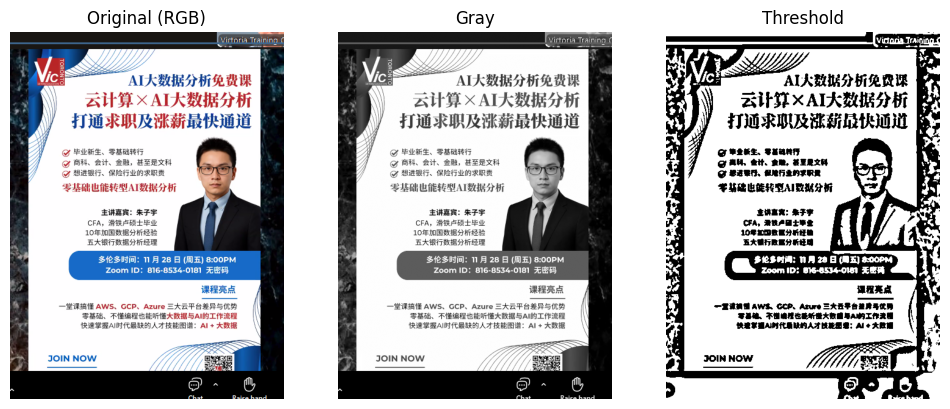

===== DEMO OCR OUTPUT (cloud calc.png) =====
n (CTTTITY
刀 7 邕
Mel “ Al 大 数 据 分 析 免 贻 课 龛^
荣 余 世 iYxA[ 大 数 拗 分 林 脚
岌 》 打 通 求 頂 及 漯 菏 城 快 通 迫 限
9 @ Sane. teanh vn
a/ gues be) 普
J. Me cg ey 有
˙ E 3 +.
遼 E { gs
﹒ 10F ROSE FRE 8
2 KgERESRMN 4 4 Gn
3 ﹣ C o Ii
na E \
cy EWM AWS. CCP. Azure SABPCURER 1
2 E 国 A
f 1
廿翟 ON NOW i
5 日 - 一



In [25]:
# Demonstrate preprocessing + OCR functions on cloud calc.png

image_path = "cloud calc.png"

# 1. Preprocess
img_rgb, th = preprocess_for_ocr(image_path)

# 2. Show preprocessing results
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Original (RGB)")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Gray")
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY), cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Threshold")
plt.imshow(th, cmap="gray")
plt.axis("off")

plt.show()

# 3. OCR on thresholded image
demo_text = run_multilingual_ocr(th)
print("===== DEMO OCR OUTPUT (cloud calc.png) =====")
print(demo_text[:800])   # print only first 800 chars


## Task 4 – LLM Postprocessing Pipeline

Raw OCR output often contains:

- extra line breaks  
- missing characters  
- mis-recognized Chinese  
- broken English acronyms  
- messy spacing  

To improve usability, I connect the OCR output to a **local LLM (Llama 3)** via **Ollama**.

The LLM is asked to:

1. Clean and rewrite the Chinese + English text  
2. Summarize the poster  
3. Extract structured information into JSON:
   - title
   - speaker name and background
   - date and time
   - Zoom ID
   - key topics

The next code cell implements this pipeline.


In [27]:
from openai import OpenAI

# Connect to local Ollama server using OpenAI client format
ollama_client = OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama"   # any string works
)

def ask_llm(prompt: str, model: str = "llama3", temperature: float = 0.2):
    """
    Send text to local Llama 3 via Ollama and return the response.
    """
    resp = ollama_client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "You are an expert assistant that cleans OCR text and extracts structured data."},
            {"role": "user", "content": prompt}
        ],
        temperature=temperature
    )
    return resp.choices[0].message.content


In [28]:
# Full pipeline: preprocess -> OCR -> LLM postprocessing

image_path = "cloud calc.png"

# 1. Preprocess image
img_rgb, th = preprocess_for_ocr(image_path)

# 2. OCR step
raw_text = run_multilingual_ocr(th)

print("========== RAW OCR (truncated) ==========")
print(raw_text[:800])

# 3. LLM step – cleaning + summarization + structured JSON
prompt = f"""
Below is OCR text extracted from a Chinese-English course poster.
The text may contain recognition errors.

Please do the following:
1. Rewrite the text cleanly in Chinese (preserving English acronyms).
2. Summarize the poster in 3 bullet points (in Chinese).
3. Extract the following fields into JSON if possible:
   - title_zh
   - title_en
   - speaker_name
   - speaker_background
   - date
   - time
   - zoom_id
   - location
   - topics (list)

Here is the OCR text:

\"\"\"{raw_text}\"\"\"
"""

llm_result = ask_llm(prompt)

print("\n\n========== LLM POST-PROCESSING RESULT ==========")
print(llm_result)


========== RAW OCR (truncated) ==========
n (CTTTITY
刀 7 邕
Mel “ Al 大 数 据 分 析 免 贻 课 龛^
荣 余 世 iYxA[ 大 数 拗 分 林 脚
岌 》 打 通 求 頂 及 漯 菏 城 快 通 迫 限
9 @ Sane. teanh vn
a/ gues be) 普
J. Me cg ey 有
˙ E 3 +.
遼 E { gs
﹒ 10F ROSE FRE 8
2 KgERESRMN 4 4 Gn
3 ﹣ C o Ii
na E \
cy EWM AWS. CCP. Azure SABPCURER 1
2 E 国 A
f 1
廿翟 ON NOW i
5 日 - 一



========== LLM POST-PROCESSING RESULT ==========
I'd be happy to help you with that!

**Rewritten text in Chinese (preserving English acronyms):**

刀7邕 Mel“Al”大數據分析免費課程講座

荣余世iYxA[大數據分林脚岌》打通求頂及漯菏城快通迫限

9@Sane.teanhvn a/guesbe)普J.Mecg ey有E3+遼E{gs}10FROSE FRE8 2KGERESRMN4Gn3Coi na E\cy EWM AWS.CCP.Azure SABPCURER1 2E国A f1廿翟ON NOW i5日-一

**Summary in 3 bullet points (in Chinese):**

• Mel“Al”大數據分析免費課程講座
• 課程內容未知，可能涉及大數據分析和相關技術
• 日期：5日，時間：未知，地点：ON NOW i

**Extracted fields in JSON:**

```
{
  "title_zh": "刀7邕 Mel“Al”大數據分析免費課程講座",
  "title_en": "",
  "speaker_name": "Mel“Al”",
  "speaker_background": "",
  "date": "5日",
  "time": "",
  "zoom_id": "",
  "location": "ON 

### Task 4 – Pipeline Analysis

This pipeline demonstrates how traditional OCR (Tesseract) can be combined
with a powerful local LLM (Llama 3 via Ollama) to produce much more usable
outputs from complex images such as Chinese posters.

**Benefits of the pipeline:**

- The LLM corrects many OCR errors (especially Chinese strokes).
- It removes line breaks and restructures sentences.
- It summarizes the poster into human-readable bullet points.
- It extracts key fields into JSON, making the output machine-usable.
- It turns a messy OCR output into structured, reliable information.

**Conclusion:**

This approach represents a modern solution for document understanding,
combining classical OCR with generative AI. While Tesseract alone can
capture text, LLMs enhance clarity, structure, and meaning—creating a
robust multilingual data extraction workflow.
